# Lab Assignment 3 
# KNN Algorithm

Write down a python program to determine the class label of given instance using KNN algorithm.

Vary the number of k from 1 to 7.



# 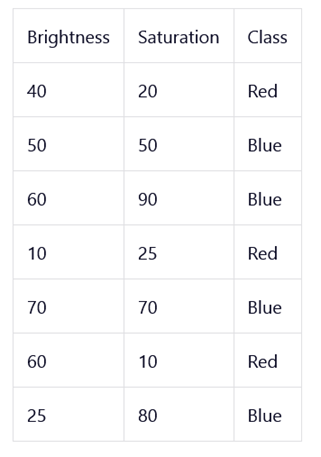

#### Value of test instance is 

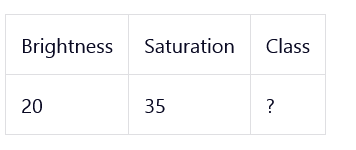

In [9]:
import numpy as np
import random

x = [40, 50, 60, 10, 70, 60, 25]
y = [20, 50, 90, 25, 70, 10, 80]
classes = ['Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue']


X_train = np.column_stack((x, y))
y_train = np.array(classes)
print(X_train)

X_test = np.array([35, 80])
# X_test = np.array([random.choice(X_train)]) we will use this iff we want to take random test data

# Step 2: Calculate Euclidean distances manually
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))


distances = []
for i, train_point in enumerate(X_train):
    dist = euclidean_distance(X_test, train_point)
    distances.append((dist, y_train[i]))

distances.sort(key=lambda x: x[0])
print(distances)

k = 3  # can change k as needed
k_nearest_neighbors = distances[:k]
k_labels = [label for _, label in k_nearest_neighbors]



predicted_label = max(set(k_labels), key=k_labels.count)


print(f"Predicted label for the test point {X_test}: {predicted_label}")

[[40 20]
 [50 50]
 [60 90]
 [10 25]
 [70 70]
 [60 10]
 [25 80]]
[(10.0, 'Blue'), (26.92582403567252, 'Blue'), (33.54101966249684, 'Blue'), (36.40054944640259, 'Blue'), (60.207972893961475, 'Red'), (60.41522986797286, 'Red'), (74.33034373659252, 'Red')]
Predicted label for the test point [35 80]: Blue


By Using Random Test Indices From the same dataset

In [10]:
import numpy as np
import random


x = [40, 50, 60, 10, 70, 60, 25]
y = [20, 50, 90, 25, 70, 10, 80]
classes = ['Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue']


X = np.column_stack((x, y))
y = np.array(classes)


def train_test_split(X, y, test_size=0.2):
    
    test_count = 2
    # Randomly selecting test indices
    test_indices = random.sample(range(len(X)), test_count)
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    
    X_train = np.delete(X, test_indices, axis=0)
    y_train = np.delete(y, test_indices, axis=0)
    
    return X_train, X_test, y_train, y_test


def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))


def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    
    for test_point in X_test:
        
        distances = []
        for i, train_point in enumerate(X_train):
            dist = euclidean_distance(test_point, train_point)
            distances.append((dist, y_train[i]))  
        
        
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = distances[:k]
        
       
        k_labels = [label for _, label in k_nearest_neighbors]
        
        
        predicted_label = max(set(k_labels), key=k_labels.count)
        predictions.append(predicted_label)
    
    return predictions



X_train, X_test, y_train, y_test = train_test_split(X, y)


y_pred = knn_predict(X_train, y_train, X_test)


print(f"Test Points:\n{X_test}")
print(f"Predicted labels: {y_pred}")
print(f"Actual labels: {y_test}")



Test Points:
[[60 10]
 [50 50]]
Predicted labels: ['Red', 'Blue']
Actual labels: ['Red' 'Blue']
